In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import mne
import os.path as op

### Determine if you deal with nifti1 or nifti2 given a .nii file.
(see https://discourse.itk.org/t/nifti-1-or-nifti-2-data-format/4330)

In [57]:
file_name = './datasets/aal/atlas/AAL2.nii'
nii1_sizeof_hdr = 348
nii2_sizeof_hdr = 540

with open(file_name, 'rb') as fp:
    byte_data = fp.read(4)
    sizeof_hdr = int.from_bytes(byte_data, byteorder='little')
    if sizeof_hdr == nii1_sizeof_hdr:
        print('nifti1')
    elif sizeof_hdr == nii2_sizeof_hdr:
        print('nifti2')
    else: #big endian
        sizeof_hdr = int.from_bytes(byte_data, byteorder='big')
        if sizeof_hdr == nii1_sizeof_hdr:
            print('nifti1')
        elif sizeof_hdr == nii2_sizeof_hdr:
            print('nifti2')

nifti1


Now I saw, that this is actually displayed in the finder too.

### Read the aal2-atlas and extract some info
(see https://nipy.org/nibabel/gettingstarted.html)

In [58]:
img = nib.load(file_name)

In [6]:
img.shape

(91, 109, 91)

In [59]:
img.get_data_dtype()

dtype('>i2')

In [16]:
print(img.affine.shape)
print(img.affine)

print(img.affine @ [0,0,0,1])
print(img.affine @ np.hstack((90, 108, 90, 1)))

(4, 4)
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
[  90. -126.  -72.    1.]
[-90.  90. 108.   1.]


In [61]:
data = img.get_fdata()
print(data.shape)
print(np.min(data))
print(np.max(data))

(91, 109, 91)
0.0
9170.0


In [16]:
hdr = img.header
print(hdr)
print(hdr.get_xyzt_units())

<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]

In [17]:
img2 = nib.load("./datasets/aal/aal2.nii.gz")

In [18]:
img3 = nib.load("./datasets/aal/ROI_MNI_V5.nii")

np.all(img3.get_data() == data)

/var/folders/0l/jbpgzw1115n30m0dk2mmp60c0000gn/T/ipykernel_14958/241724561.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  np.all(img3.get_data() == data)


True

In [14]:
img2.shape

(91, 109, 91)

# ...

Text(0.5, 0.98, 'Center slices for EPI image')

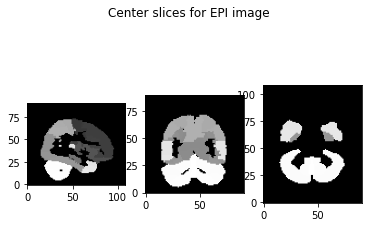

In [15]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = data[26, :, :]
slice_1 = data[:, 30, :]
slice_2 = data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

### Access the coordinates of the source space

In [16]:
import os.path as op
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = op.join(data_path, 'MEG', 'sample',)
raw_fname = op.join(sample_dir, 'sample_audvis_raw.fif')
# The paths to Freesurfer reconstructions
subjects_dir = op.join(data_path, 'subjects')
subject = 'sample'

In [17]:
src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch',
                             subjects_dir=subjects_dir)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/martin/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/155407 selected to source space (oct = 4)

Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 258/156866 selected to so

In [18]:
src.info

{'working_dir': '/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project',
 'command_line': 'setup_source_space(sample, spacing=oct4, surface=white, subjects_dir=/Users/martin/mne_data/MNE-sample-data/subjects, add_dist=patch, verbose=None)'}

In [47]:
# shows fancy 3D visualization
src.plot(subjects_dir=subjects_dir)

Using pyvistaqt 3d backend.



In [49]:
src.export_volume("source_space_sample_subject.nii",
                  dest="surf",
                  mri_resolution= "sparse")    # dest="surf" for coordinate space of the FreeSurfer surface (Surface RAS)
                                            # mri_resolution:
                                            #
                                            # use_lut : https://surfer.nmr.mgh.harvard.edu/fswiki/LabelsClutsAnnotationFiles

Reading FreeSurfer lookup table


ValueError: Source spaces must contain at least one volume.

# Other example that works
(see https://mne.tools/stable/auto_examples/forward/left_cerebellum_volume_source.html)

In [7]:
from mne.datasets import sample

data_path = sample.data_path()
subjects_dir = op.join(data_path, 'subjects')
subject = 'sample'
aseg_fname = op.join(subjects_dir, 'sample', 'mri', 'aseg.mgz')

In [8]:
surf = mne.setup_source_space(subject, subjects_dir=subjects_dir, add_dist=False)
lh_surf = surf[0]

# setup a volume source space of the left cerebellum cortex
volume_label = 'Left-Cerebellum-Cortex'
sphere = (0, 0, 0, 0.12)
lh_cereb = mne.setup_volume_source_space(
    subject, mri=aseg_fname, sphere=sphere, volume_label=volume_label,
    subjects_dir=subjects_dir, sphere_units='m')

# Combine the source spaces
src = surf + lh_cereb

nii_fname = 'mne_sample_lh-cerebellum-cortex.nii'
src.export_volume(nii_fname, mri_resolution=True)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/martin/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/155407 selected to source space (oct = 6)

Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/156866 selected to 

(256, 256, 256)
[ 0.  3.  8. 42.]


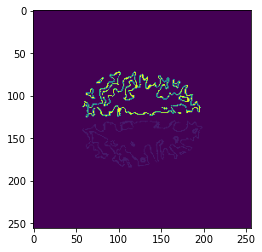

In [56]:
nii_fname = 'mne_sample_lh-cerebellum-cortex.nii'
img = nib.load(nii_fname)
data = img.get_fdata()
print(data.shape)

print(np.unique(data))

plt.imshow((data[:, 60,:]))
plt.show()

# is the "turned off" hemisphere maybe assigned one of the intermediate values?

In [22]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : -0.70710677
quatern_d       : 0.70710677
qoffset_x       : 128.0
qoffset_y       : -128.0
qoffset_z       : 128.0
srow_x          : [ -1.  

In [24]:
hdr = img.header
print(hdr.get_xyzt_units())

('mm', 'unknown')


# Theres a "LUT" delivered with AAL2

In [4]:
# mne.read_freesurfer_lut("./datasets/aal/aal2.nii.lut")
mne.read_freesurfer_lut()

({'Unknown': 0,
  'Left-Cerebral-Exterior': 1,
  'Left-Cerebral-White-Matter': 2,
  'Left-Cerebral-Cortex': 3,
  'Left-Lateral-Ventricle': 4,
  'Left-Inf-Lat-Vent': 5,
  'Left-Cerebellum-Exterior': 6,
  'Left-Cerebellum-White-Matter': 7,
  'Left-Cerebellum-Cortex': 8,
  'Left-Thalamus': 9,
  'Left-Thalamus-Proper': 10,
  'Left-Caudate': 11,
  'Left-Putamen': 12,
  'Left-Pallidum': 13,
  '3rd-Ventricle': 14,
  '4th-Ventricle': 15,
  'Brain-Stem': 16,
  'Left-Hippocampus': 17,
  'Left-Amygdala': 18,
  'Left-Insula': 19,
  'Left-Operculum': 20,
  'Line-1': 21,
  'Line-2': 22,
  'Line-3': 23,
  'CSF': 24,
  'Left-Lesion': 25,
  'Left-Accumbens-area': 26,
  'Left-Substancia-Nigra': 27,
  'Left-VentralDC': 28,
  'Left-undetermined': 29,
  'Left-vessel': 30,
  'Left-choroid-plexus': 31,
  'Left-F3orb': 32,
  'Left-lOg': 33,
  'Left-aOg': 34,
  'Left-mOg': 35,
  'Left-pOg': 36,
  'Left-Stellate': 37,
  'Left-Porg': 38,
  'Left-Aorg': 39,
  'Right-Cerebral-Exterior': 40,
  'Right-Cerebral-White

In [5]:
mne.read_freesurfer_lut("./datasets/aal/aal2.nii.txt")

RuntimeError: LUT is improperly formatted: ./datasets/aal/aal2.nii.txt

# Nilearn stuff

In [7]:
from nilearn.maskers import NiftiLabelsMasker

In [8]:
masker = NiftiLabelsMasker(labels_img="./datasets/aal/aal2.nii.gz", standardize=True,
                           memory='nilearn_cache', verbose=5)

In [9]:
masker

NiftiLabelsMasker(labels_img='./datasets/aal/aal2.nii.gz',
                  memory='nilearn_cache', standardize=True, verbose=5)

### Not really what I need here.

# MNI coordinates of AAL2

In [55]:
hdr2 = img.header
print(hdr2)

NameError: name 'img' is not defined

In [54]:
vx_dims = img2.header["dim"][1:4]
vx_dims

NameError: name 'img2' is not defined

In [6]:
print(img2.affine)

print(np.linalg.inv(img2.affine))

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
[[-0.5 -0.  -0.  45. ]
 [ 0.   0.5  0.  63. ]
 [ 0.   0.   0.5 36. ]
 [ 0.   0.   0.   1. ]]


In [7]:
pix_dims = img2.affine[0:3, 0:3]
offsets = img2.affine[0:3, 3]
print(pix_dims)

print(np.linalg.inv(pix_dims))

test_point = np.array([10, 10, 10]) # mm in MNI space

proj_to_vox = np.linalg.inv(pix_dims) @ (test_point - offsets)
print(proj_to_vox)

print(img2.affine @ np.hstack((proj_to_vox, 1)))

test_point_expanded = np.array([9.2, 4.3, 10, 1]) # mm in MNI space
back_proj = np.linalg.inv(img2.affine) @ test_point_expanded
print(back_proj)
print(back_proj[0:3])


[[-2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]
[[-0.5 -0.  -0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0.5]]
[40. 68. 41.]
[10. 10. 10.  1.]
[40.4  65.15 41.    1.  ]
[40.4  65.15 41.  ]


In [8]:
print(np.diag(np.linalg.inv(img2.affine))[0:3] * back_proj[0:3])
print(np.round(np.diag(np.linalg.inv(img2.affine))[0:3] * back_proj[0:3], 0))
print(np.round(np.diag(np.linalg.inv(img2.affine))[0:3] * back_proj[0:3], 0) * np.diag(pix_dims))
print(np.round(np.diag(np.linalg.inv(img2.affine)) * back_proj, 0) * np.diag(img2.affine))

[-20.2    32.575  20.5  ]
[-20.  33.  20.]
[40. 66. 40.]
[40. 66. 40.  1.]


In [10]:
np.all(np.round(np.diag(np.linalg.inv(img2.affine)) * back_proj, 0) * np.diag(img2.affine) == [40, 66, 40, 1])

True

# Test atlas reading: What happens with invalid point?

In [2]:
from util import get_labels_of_points

In [7]:
#get_labels_of_points(np.array([[20,10,20]]), atlas="aal2")
get_labels_of_points(np.array([[-6, 14, 0]]), atlas="aal2")

([True], array([7001.]), ['label'])

# Read altal labels from xml

In [8]:
from xml.dom import minidom

In [11]:
xml_file = minidom.parse("./datasets/aal/atlas/AAL2.xml")

In [16]:
xml_file.getElementsByTagName("index")[0]

AttributeError: 'Element' object has no attribute 'data'

In [17]:
xml_file

In [19]:
from xml.etree import ElementTree

tree = ElementTree.parse("./datasets/aal/atlas/AAL2.xml")

In [21]:
root = tree.getroot()

In [22]:
for child in root:
    print(child)

<Element 'header' at 0x146405260>
<Element 'data' at 0x146405a80>


In [30]:
for element in root[1]:
    print(element[0], element[1])

<Element 'index' at 0x146407ab0> <Element 'name' at 0x146405a30>
<Element 'index' at 0x146406110> <Element 'name' at 0x1464057b0>
<Element 'index' at 0x146407a10> <Element 'name' at 0x146405990>
<Element 'index' at 0x1464058a0> <Element 'name' at 0x146407240>
<Element 'index' at 0x146406390> <Element 'name' at 0x146407f10>
<Element 'index' at 0x1464052b0> <Element 'name' at 0x1464071f0>
<Element 'index' at 0x1464063e0> <Element 'name' at 0x146406160>
<Element 'index' at 0x146405300> <Element 'name' at 0x1465182c0>
<Element 'index' at 0x1465192b0> <Element 'name' at 0x1465195d0>
<Element 'index' at 0x146518a90> <Element 'name' at 0x146519300>
<Element 'index' at 0x146519990> <Element 'name' at 0x146518fe0>
<Element 'index' at 0x14651a160> <Element 'name' at 0x1465191c0>
<Element 'index' at 0x146519bc0> <Element 'name' at 0x146519df0>
<Element 'index' at 0x146518180> <Element 'name' at 0x14651a340>
<Element 'index' at 0x14651a1b0> <Element 'name' at 0x146519cb0>
<Element 'index' at 0x146

In [32]:
for element in root[1]:
    print(element[0].text, element[1].text)

2001 Precentral_L
2002 Precentral_R
2101 Frontal_Sup_2_L
2102 Frontal_Sup_2_R
2201 Frontal_Mid_2_L
2202 Frontal_Mid_2_R
2301 Frontal_Inf_Oper_L
2302 Frontal_Inf_Oper_R
2311 Frontal_Inf_Tri_L
2312 Frontal_Inf_Tri_R
2321 Frontal_Inf_Orb_2_L
2322 Frontal_Inf_Orb_2_R
2331 Rolandic_Oper_L
2332 Rolandic_Oper_R
2401 Supp_Motor_Area_L
2402 Supp_Motor_Area_R
2501 Olfactory_L
2502 Olfactory_R
2601 Frontal_Sup_Medial_L
2602 Frontal_Sup_Medial_R
2611 Frontal_Med_Orb_L
2612 Frontal_Med_Orb_R
2701 Rectus_L
2702 Rectus_R
2801 OFCmed_L
2802 OFCmed_R
2811 OFCant_L
2812 OFCant_R
2821 OFCpost_L
2822 OFCpost_R
2831 OFClat_L
2832 OFClat_R
3001 Insula_L
3002 Insula_R
4001 Cingulate_Ant_L
4002 Cingulate_Ant_R
4011 Cingulate_Mid_L
4012 Cingulate_Mid_R
4021 Cingulate_Post_L
4022 Cingulate_Post_R
4101 Hippocampus_L
4102 Hippocampus_R
4111 ParaHippocampal_L
4112 ParaHippocampal_R
4201 Amygdala_L
4202 Amygdala_R
5001 Calcarine_L
5002 Calcarine_R
5011 Cuneus_L
5012 Cuneus_R
5021 Lingual_L
5022 Lingual_R
5101 Occip

In [33]:
root.attrib

{'version': '2.0'}

In [39]:
print(root[0].tag)
print(root[1].tag)

header
data


In [40]:
root.data

AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'data'

In [46]:
label_lut = {}
for region in root.find("data").findall("label"):
    label_lut[region.find("index").text] = region.find("name").text

In [49]:
label_lut.keys()

dict_keys(['2001', '2002', '2101', '2102', '2201', '2202', '2301', '2302', '2311', '2312', '2321', '2322', '2331', '2332', '2401', '2402', '2501', '2502', '2601', '2602', '2611', '2612', '2701', '2702', '2801', '2802', '2811', '2812', '2821', '2822', '2831', '2832', '3001', '3002', '4001', '4002', '4011', '4012', '4021', '4022', '4101', '4102', '4111', '4112', '4201', '4202', '5001', '5002', '5011', '5012', '5021', '5022', '5101', '5102', '5201', '5202', '5301', '5302', '5401', '5402', '6001', '6002', '6101', '6102', '6201', '6202', '6211', '6212', '6221', '6222', '6301', '6302', '6401', '6402', '7001', '7002', '7011', '7012', '7021', '7022', '7101', '7102', '8101', '8102', '8111', '8112', '8121', '8122', '8201', '8202', '8211', '8212', '8301', '8302', '9001', '9002', '9011', '9012', '9021', '9022', '9031', '9032', '9041', '9042', '9051', '9052', '9061', '9062', '9071', '9072', '9081', '9082', '9100', '9110', '9120', '9130', '9140', '9150', '9160', '9170'])

In [50]:
tree